# Exploratory Data Analysis (EDA)
## Predicting AI Acceptance in Mental Health Interventions through Self-Determination Theory

This notebook focuses on exploratory data analysis and feature exploration related to our hypotheses.

### Research Questions:
- **H1**: Main Effect - SDT predicts AI Acceptance
- **H2**: Attitudinal Moderation - AI attitudes moderate SDT → AI Acceptance relationship
- **H3**: Cross-Cultural Moderation - Effects stronger in China vs US
- **H4**: Mediation by Epistemic Trust - Epistemic Trust mediates SDT → AI Acceptance


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Import data utilities
from data_utils import load_and_prepare_data, create_composite_scores_cn, create_composite_scores_usa

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Initial Inspection


In [5]:
# Load data files
cn_all = pd.read_csv('data/china/CN_all.csv')
cn_client = pd.read_csv('data/china/CN_client.csv')
cn_therapist = pd.read_csv('data/china/CN_therapist.csv')
usa_all = pd.read_csv('data/usa/USA_all.csv')

print(f"China All Sample: {cn_all.shape}")
print(f"China Client Sample: {cn_client.shape}")
print(f"China Therapist Sample: {cn_therapist.shape}")
print(f"USA All Sample: {usa_all.shape}")
print(f"\nTotal columns in CN_all: {len(cn_all.columns)}")


China All Sample: (485, 514)
China Client Sample: (216, 565)
China Therapist Sample: (269, 565)
USA All Sample: (1857, 624)

Total columns in CN_all: 514


## 2. Variable Construction and Harmonization


In [6]:
# Create composite scores for China data
print("Processing China data...")
cn_all = create_composite_scores_cn(cn_all)
cn_client = create_composite_scores_cn(cn_client)
cn_therapist = create_composite_scores_cn(cn_therapist)

print("\nProcessing USA data...")
usa_all = create_composite_scores_usa(usa_all)

print("\n✓ All composite scores created!")


Processing China data...
TENS_Life_mean created from 9 items
ET_mean created from 15 items
SSRPH_mean created from 5 items
PHQ5_mean created from 5 items
UTAUT_AI_mean created from 37 items
would_you_use_mean created from 7 items
TENS_Life_mean created from 9 items
ET_mean created from 15 items
SSRPH_mean created from 5 items
PHQ5_mean created from 5 items
UTAUT_AI_mean created from 37 items
would_you_use_mean created from 7 items
TENS_Life_mean created from 9 items
ET_mean created from 15 items
SSRPH_mean created from 5 items
PHQ5_mean created from 5 items
UTAUT_AI_mean created from 37 items
would_you_use_mean created from 7 items

Processing USA data...
TENS_Life_mean created from 9 items
ET_mean created from 15 items
SSRPH_mean created from 5 items
PHQ5_mean created from 5 items
UTAUT_AI_mean created from 26 items
would_you_use_mean created from 7 items

✓ All composite scores created!


In [7]:
# Select key variables for analysis
key_vars = ['TENS_Life_mean', 'UTAUT_AI_mean', 'GAAIS_mean', 'ET_mean', 
            'SSRPH_mean', 'PHQ5_mean', 'would_you_use_mean', 
            'age', 'gender', 'role', 'country']

# Create combined dataset
cn_analysis = cn_all[key_vars + ['ID'] if 'ID' in cn_all.columns else key_vars].copy()

usa_analysis = usa_all[key_vars + ['ResponseId'] if 'ResponseId' in usa_all.columns else key_vars].copy()
if 'ResponseId' in usa_all.columns:
    usa_analysis = usa_analysis.rename(columns={'ResponseId': 'ID'})

# Combine datasets
combined_data = pd.concat([cn_analysis, usa_analysis], ignore_index=True)

# Create country code (0 = USA, 1 = China) for analysis
combined_data['country_code'] = combined_data['country'].map({'USA': 0, 'China': 1})

# Remove rows with missing key variables
print(f"Before cleaning: {len(combined_data)} rows")
combined_data = combined_data.dropna(subset=['TENS_Life_mean', 'UTAUT_AI_mean'])
print(f"After cleaning: {len(combined_data)} rows")
print(f"  - China: {len(combined_data[combined_data['country'] == 'China'])}")
print(f"  - USA: {len(combined_data[combined_data['country'] == 'USA'])}")

print("\n✓ Combined dataset created!")
print(combined_data.head())


Before cleaning: 2342 rows
After cleaning: 2096 rows
  - China: 485
  - USA: 1611

✓ Combined dataset created!
   TENS_Life_mean  UTAUT_AI_mean  GAAIS_mean   ET_mean  SSRPH_mean  PHQ5_mean  \
0        4.111111       3.675676       3.500  4.133333         2.6        1.0   
1        4.444444       3.432432       4.375  3.933333         1.6        0.8   
2        4.666667       3.567568       3.375  4.266667         3.0        2.4   
3        3.333333       1.891892       4.000  4.466667         2.6        0.4   
4        4.333333       3.594595       3.250  4.800000         3.4        2.0   

   would_you_use_mean   age  gender  role country     ID  country_code  
0                 1.0  10.0     3.0   1.0   China  380.0             1  
1                 1.0  17.0     3.0   1.0   China  269.0             1  
2                 1.0   2.0     3.0   1.0   China   73.0             1  
3                 1.0   7.0     3.0   0.0   China  544.0             1  
4                 1.0   1.0     3.0  

## 3. Descriptive Statistics


In [8]:
# Descriptive statistics by country
desc_stats = combined_data.groupby('country')[['TENS_Life_mean', 'UTAUT_AI_mean', 'GAAIS_mean', 
                                                 'ET_mean', 'SSRPH_mean', 'PHQ5_mean', 
                                                 'would_you_use_mean', 'age']].describe()

print("Descriptive Statistics by Country:")
print(desc_stats)


Descriptive Statistics by Country:
        TENS_Life_mean                                                     \
                 count      mean       std   min       25%       50%  75%   
country                                                                     
China            485.0  4.351203  0.992311  1.00  3.777778  4.333333  5.0   
USA             1611.0  4.885613  1.000418  1.75  4.250000  5.000000  5.5   

             UTAUT_AI_mean            ... would_you_use_mean          age  \
         max         count      mean  ...                75%  max   count   
country                               ...                                   
China    7.0         485.0  3.583505  ...                1.0  1.0   485.0   
USA      7.0        1611.0  4.222222  ...                1.0  1.0  1611.0   

                                                             
              mean        std   min   25%   50%   75%   max  
country                                                      
China  

## 4. Correlation Analysis


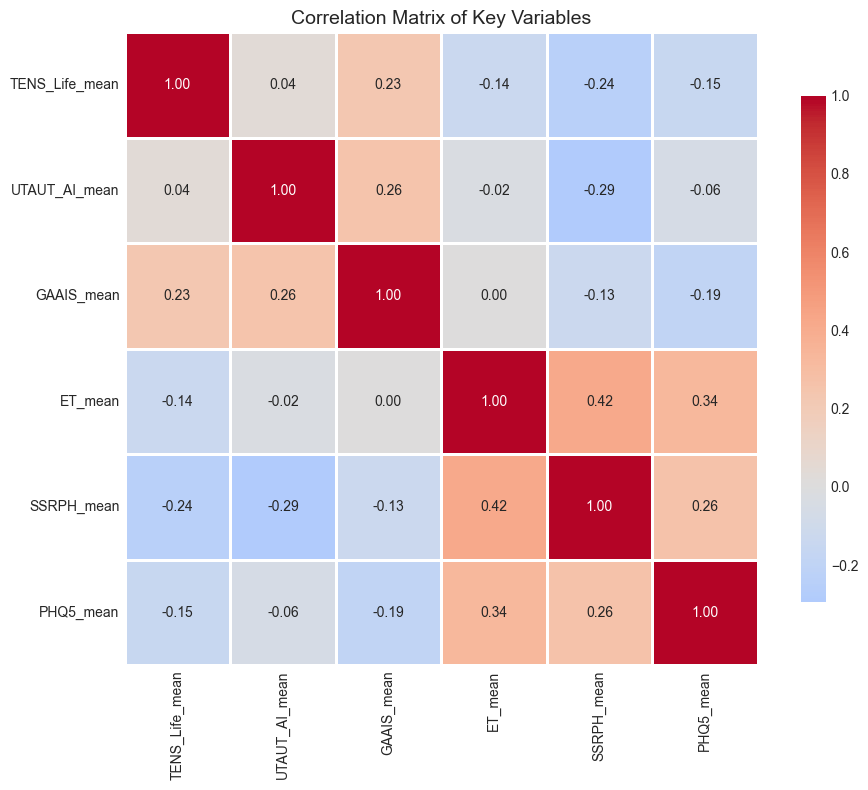


Key Correlations with UTAUT_AI_mean:
UTAUT_AI_mean     1.000000
GAAIS_mean        0.256535
TENS_Life_mean    0.038076
ET_mean          -0.021502
PHQ5_mean        -0.058223
SSRPH_mean       -0.294301
Name: UTAUT_AI_mean, dtype: float64


In [10]:
# Correlation matrix
corr_vars = ['TENS_Life_mean', 'UTAUT_AI_mean', 'GAAIS_mean', 'ET_mean', 
             'SSRPH_mean', 'PHQ5_mean']
corr_matrix = combined_data[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

# Print key correlations
print("\nKey Correlations with UTAUT_AI_mean:")
print(corr_matrix['UTAUT_AI_mean'].sort_values(ascending=False))


## 5. Visualizations - Key Variables by Country


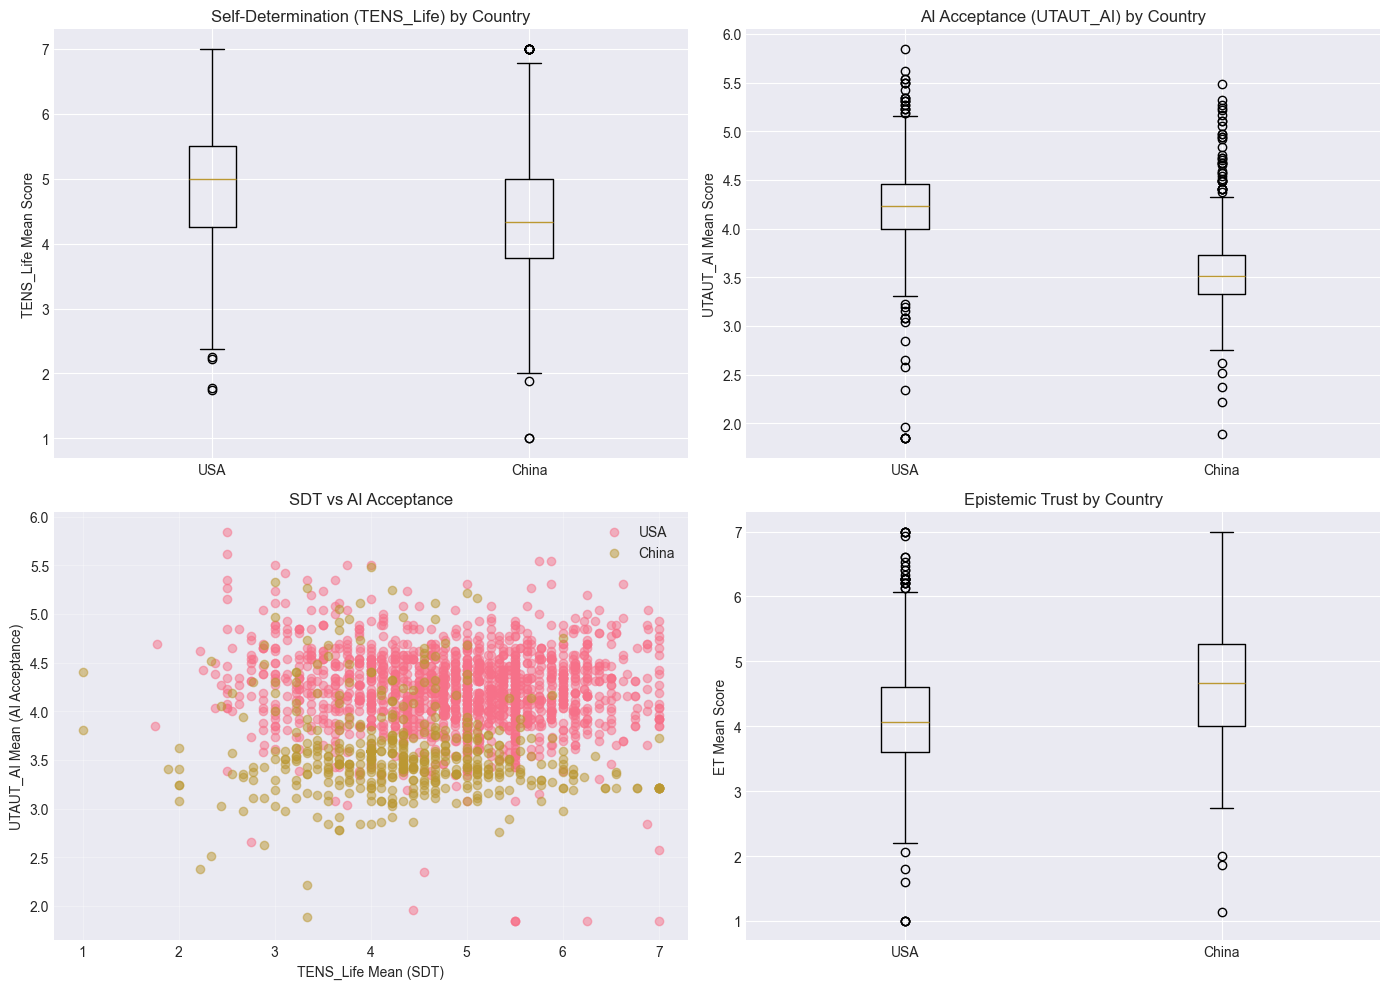

In [11]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. SDT by Country
axes[0, 0].boxplot([combined_data[combined_data['country'] == 'USA']['TENS_Life_mean'],
                    combined_data[combined_data['country'] == 'China']['TENS_Life_mean']],
                   labels=['USA', 'China'])
axes[0, 0].set_title('Self-Determination (TENS_Life) by Country')
axes[0, 0].set_ylabel('TENS_Life Mean Score')

# 2. AI Acceptance by Country
axes[0, 1].boxplot([combined_data[combined_data['country'] == 'USA']['UTAUT_AI_mean'],
                    combined_data[combined_data['country'] == 'China']['UTAUT_AI_mean']],
                   labels=['USA', 'China'])
axes[0, 1].set_title('AI Acceptance (UTAUT_AI) by Country')
axes[0, 1].set_ylabel('UTAUT_AI Mean Score')

# 3. SDT vs AI Acceptance scatter
for country in ['USA', 'China']:
    subset = combined_data[combined_data['country'] == country]
    axes[1, 0].scatter(subset['TENS_Life_mean'], subset['UTAUT_AI_mean'], 
                       alpha=0.5, label=country)
axes[1, 0].set_xlabel('TENS_Life Mean (SDT)')
axes[1, 0].set_ylabel('UTAUT_AI Mean (AI Acceptance)')
axes[1, 0].set_title('SDT vs AI Acceptance')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Epistemic Trust by Country
axes[1, 1].boxplot([combined_data[combined_data['country'] == 'USA']['ET_mean'],
                    combined_data[combined_data['country'] == 'China']['ET_mean']],
                   labels=['USA', 'China'])
axes[1, 1].set_title('Epistemic Trust by Country')
axes[1, 1].set_ylabel('ET Mean Score')

plt.tight_layout()
plt.show()


## 6. Feature Exploration - Relationship to Hypotheses


In [12]:
# Explore relationships relevant to hypotheses

# H1: SDT vs AI Acceptance
print("=== H1: SDT → AI Acceptance Relationship ===")
correlation_h1, p_h1 = stats.pearsonr(combined_data['TENS_Life_mean'], combined_data['UTAUT_AI_mean'])
print(f"Correlation: r = {correlation_h1:.3f}, p = {p_h1:.4f}")

# H2: AI Attitudes (GAAIS)
print("\n=== H2: AI Attitudes (GAAIS) ===")
print(f"GAAIS_mean statistics:")
print(combined_data['GAAIS_mean'].describe())
print(f"\nGAAIS by country:")
print(combined_data.groupby('country')['GAAIS_mean'].describe())

# H3: Cross-cultural differences
print("\n=== H3: Cross-Cultural Differences ===")
print("Mean differences by country:")
country_comparison = combined_data.groupby('country')[['TENS_Life_mean', 'UTAUT_AI_mean', 'ET_mean']].mean()
print(country_comparison)

# H4: Epistemic Trust
print("\n=== H4: Epistemic Trust (ET) ===")
correlation_et_sdt, p_et_sdt = stats.pearsonr(combined_data['TENS_Life_mean'], combined_data['ET_mean'])
correlation_et_utaut, p_et_utaut = stats.pearsonr(combined_data['ET_mean'], combined_data['UTAUT_AI_mean'])
print(f"TENS_Life → ET: r = {correlation_et_sdt:.3f}, p = {p_et_sdt:.4f}")
print(f"ET → UTAUT_AI: r = {correlation_et_utaut:.3f}, p = {p_et_utaut:.4f}")


=== H1: SDT → AI Acceptance Relationship ===
Correlation: r = 0.038, p = 0.0814

=== H2: AI Attitudes (GAAIS) ===
GAAIS_mean statistics:
count    2096.000000
mean        4.115279
std         0.795180
min         1.500000
25%         3.500000
50%         4.125000
75%         4.750000
max         5.500000
Name: GAAIS_mean, dtype: float64

GAAIS by country:
          count      mean       std  min    25%    50%    75%  max
country                                                           
China     485.0  4.068041  0.693235  2.0  3.500  4.000  4.625  5.5
USA      1611.0  4.129500  0.823070  1.5  3.625  4.125  4.750  5.5

=== H3: Cross-Cultural Differences ===
Mean differences by country:
         TENS_Life_mean  UTAUT_AI_mean   ET_mean
country                                         
China          4.351203       3.583505  4.696495
USA            4.885613       4.222222  4.144838

=== H4: Epistemic Trust (ET) ===
TENS_Life → ET: r = -0.136, p = 0.0000
ET → UTAUT_AI: r = -0.022, p = 0.3251

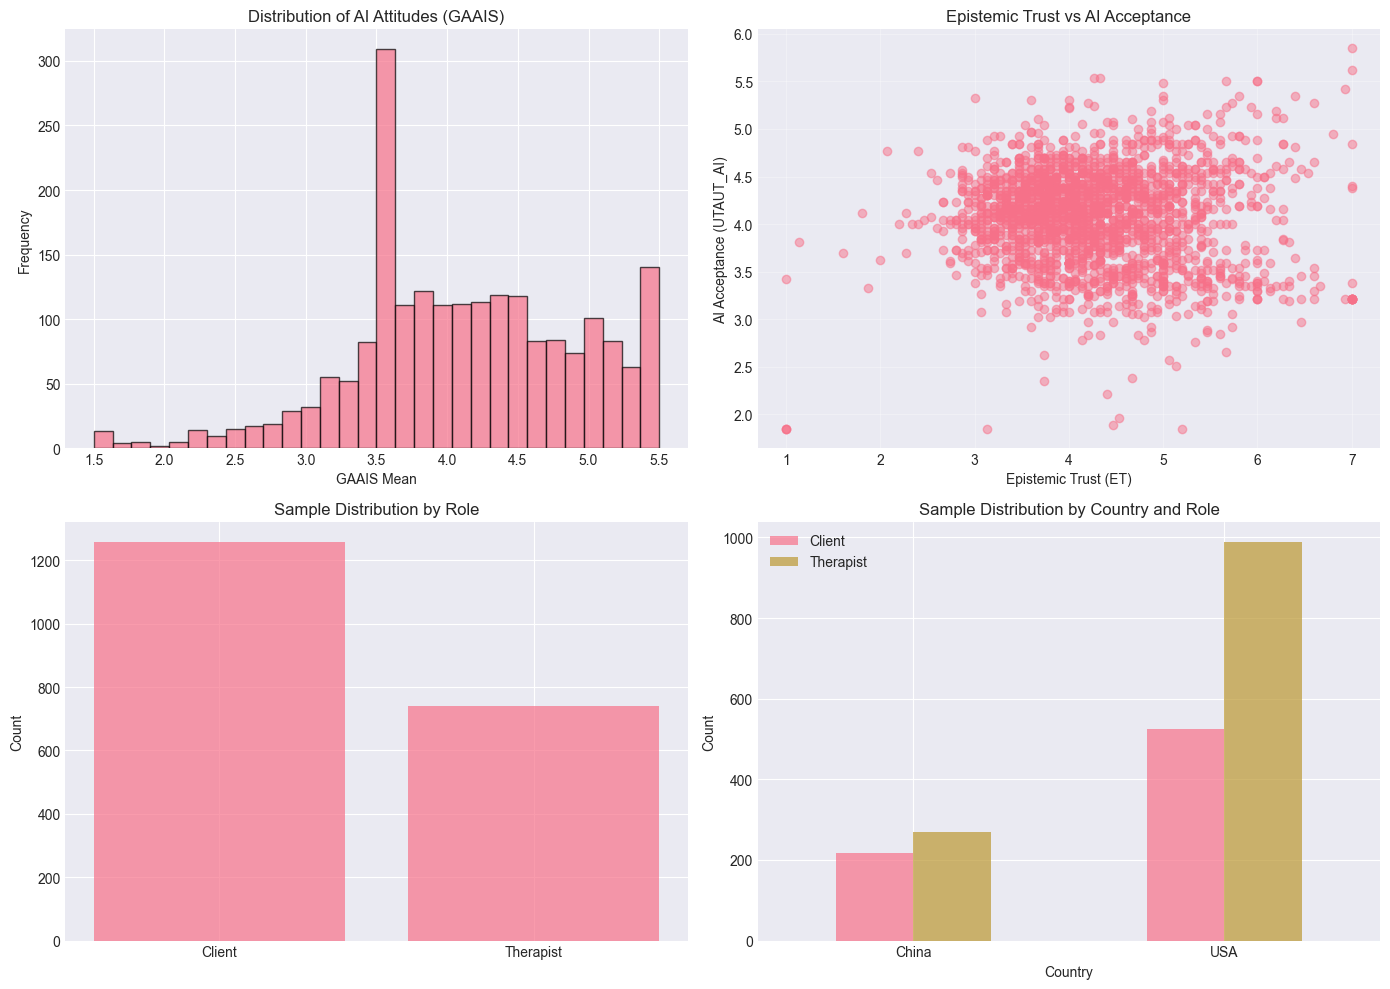

In [13]:
# Additional visualizations for hypothesis exploration

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. GAAIS distribution
axes[0, 0].hist(combined_data['GAAIS_mean'].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of AI Attitudes (GAAIS)')
axes[0, 0].set_xlabel('GAAIS Mean')
axes[0, 0].set_ylabel('Frequency')

# 2. ET vs UTAUT_AI
axes[0, 1].scatter(combined_data['ET_mean'], combined_data['UTAUT_AI_mean'], alpha=0.5)
axes[0, 1].set_xlabel('Epistemic Trust (ET)')
axes[0, 1].set_ylabel('AI Acceptance (UTAUT_AI)')
axes[0, 1].set_title('Epistemic Trust vs AI Acceptance')
axes[0, 1].grid(True, alpha=0.3)

# 3. Role distribution
role_counts = combined_data['role'].value_counts()
axes[1, 0].bar(['Client', 'Therapist'], role_counts.values, alpha=0.7)
axes[1, 0].set_title('Sample Distribution by Role')
axes[1, 0].set_ylabel('Count')

# 4. Country and role distribution
country_role = pd.crosstab(combined_data['country'], combined_data['role'])
country_role.plot(kind='bar', ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Sample Distribution by Country and Role')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(['Client', 'Therapist'])
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


## 7. Missing Data Analysis


Missing Data Summary:
             Variable  Missing Count  Missing Percentage
9                role             97            4.627863
4          SSRPH_mean             11            0.524809
6  would_you_use_mean              8            0.381679
0      TENS_Life_mean              0            0.000000
1       UTAUT_AI_mean              0            0.000000
2          GAAIS_mean              0            0.000000
3             ET_mean              0            0.000000
5           PHQ5_mean              0            0.000000
7                 age              0            0.000000
8              gender              0            0.000000


<Figure size 1000x600 with 0 Axes>

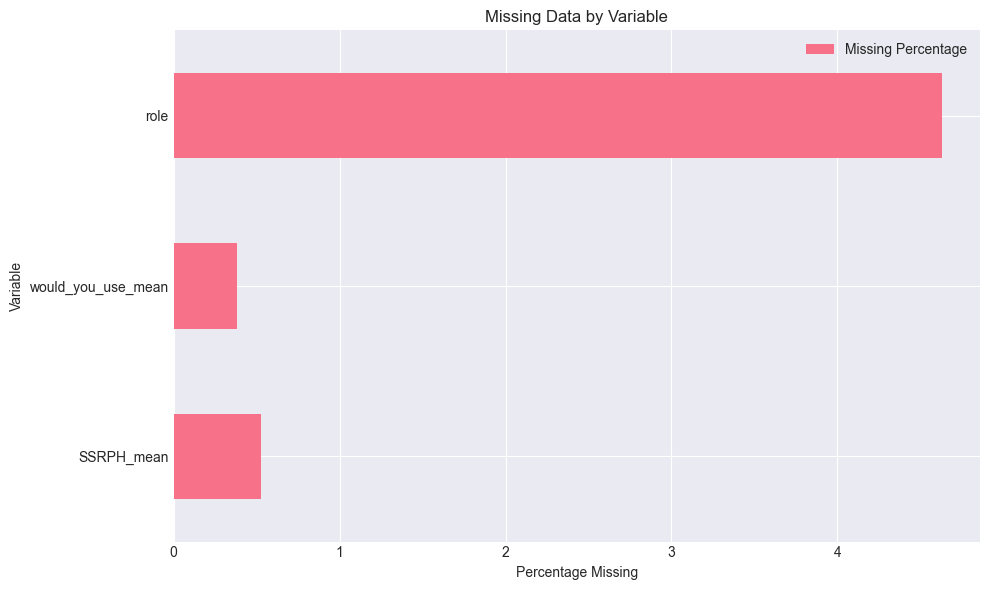

In [14]:
# Check missing data
key_vars_check = ['TENS_Life_mean', 'UTAUT_AI_mean', 'GAAIS_mean', 'ET_mean', 
                  'SSRPH_mean', 'PHQ5_mean', 'would_you_use_mean', 
                  'age', 'gender', 'role']

missing_data = combined_data[key_vars_check].isnull().sum()
missing_pct = (missing_data / len(combined_data)) * 100

missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_pct.values
})

print("Missing Data Summary:")
print(missing_df.sort_values('Missing Percentage', ascending=False))

# Visualize missing data
if missing_data.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_df[missing_df['Missing Count'] > 0].plot(x='Variable', y='Missing Percentage', 
                                                      kind='barh', figsize=(10, 6))
    plt.title('Missing Data by Variable')
    plt.xlabel('Percentage Missing')
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing data in key variables after cleaning!")


## 8. Save Processed Data

Save the combined dataset for use in hypothesis testing notebooks.


In [15]:
# Save processed data for use in other notebooks
combined_data.to_csv('data/processed/combined_data.csv', index=False)
print("✓ Processed data saved to 'data/processed/combined_data.csv'")
print(f"  Shape: {combined_data.shape}")
print(f"  Variables: {list(combined_data.columns)}")


✓ Processed data saved to 'data/processed/combined_data.csv'
  Shape: (2096, 13)
  Variables: ['TENS_Life_mean', 'UTAUT_AI_mean', 'GAAIS_mean', 'ET_mean', 'SSRPH_mean', 'PHQ5_mean', 'would_you_use_mean', 'age', 'gender', 'role', 'country', 'ID', 'country_code']
